In [6]:
files = ["../Responses/reranked_best_answers_1_0.json", "../Responses/reranked_best_answers_1_1.json", "../Responses/reranked_best_answers_1_2.json"]

In [16]:
import json

with open("reranked_best_answers.json", "w") as out:
    for file in files:
        with open(file) as f:
            data = json.load(f)
        freq = {}
        for datapoint in data:
            datapoint["best_model"].replace("'", "").replace("\"", "").replace(".json", "").replace("_response","").lower()
            if datapoint["best_model"].replace("'", "").replace("\"", "").replace(".json", "").replace("_response","").lower() not in freq:
                freq[datapoint["best_model"].replace("'", "").replace("\"", "").replace(".json", "").replace("_response","").lower()] = 1
            else:
                freq[datapoint["best_model"].replace("'", "").replace("\"", "").replace(".json", "").replace("_response","").lower()] += 1
        print(freq)

{'zeroshot': 52, 'tf_idf_bm25_open_1_0_top_100_combined': 1, 'llamaagent': 12, 'tf-idf_1_0_top_100': 21, 'tf-idf_1_0_top_100_modified': 2, 'wikiagent': 7, 'vision_1_0_top_100': 2, 'open_source_1_0_top_100': 2, 'vision': 1}
{'zeroshot': 53, 'tf-idf_1_1_top_100': 20, 'vision': 3, 'vision_1_1_top_100': 2, 'llamaagent': 7, 'tf-idf_1_1_top_100_modified': 2, 'wikiagent': 10, 'open_source': 2, 'bm25_1_1_top_100': 1}
{'zeroshot': 54, 'tf-idf_1_2_top_100': 16, 'vision_1_2_top_100': 1, 'llamaagent': 10, 'bm25_1_2_top_100': 2, 'vision_1_2_top_100_modified': 1, 'tf-idf_1_2_top_100_modified': 1, 'wikiagent': 11, 'vision': 3, 'open_source': 1}


In [ ]:
{'zeroshot': 52, 'tf_idf_bm25_open_1_0_top_100_combined': 1, 'llamaagent': 12, 'tf-idf_1_0_top_100': 21, 'tf-idf_1_0_top_100_modified': 2, 'wikiagent': 7, 'vision_1_0_top_100': 2, 'open_source_1_0_top_100': 2}

{'zeroshot': 53, 'tf-idf_1_1_top_100': 20, 'vision': 3, 'vision_1_1_top_100': 2, 'llamaagent': 7, 'tf-idf_1_1_top_100_modified': 2, 'wikiagent': 10, 'open_source': 2, 'bm25_1_1_top_100': 1}

{'zeroshot': 54, 'tf-idf_1_2_top_100': 16, 'vision_1_2_top_100': 1, 'llamaagent': 10, 'bm25_1_2_top_100': 2, 'vision_1_2_top_100_modified': 1, 'tf-idf_1_2_top_100_modified': 1, 'wikiagent': 11, 'vision': 3, 'open_source': 1}

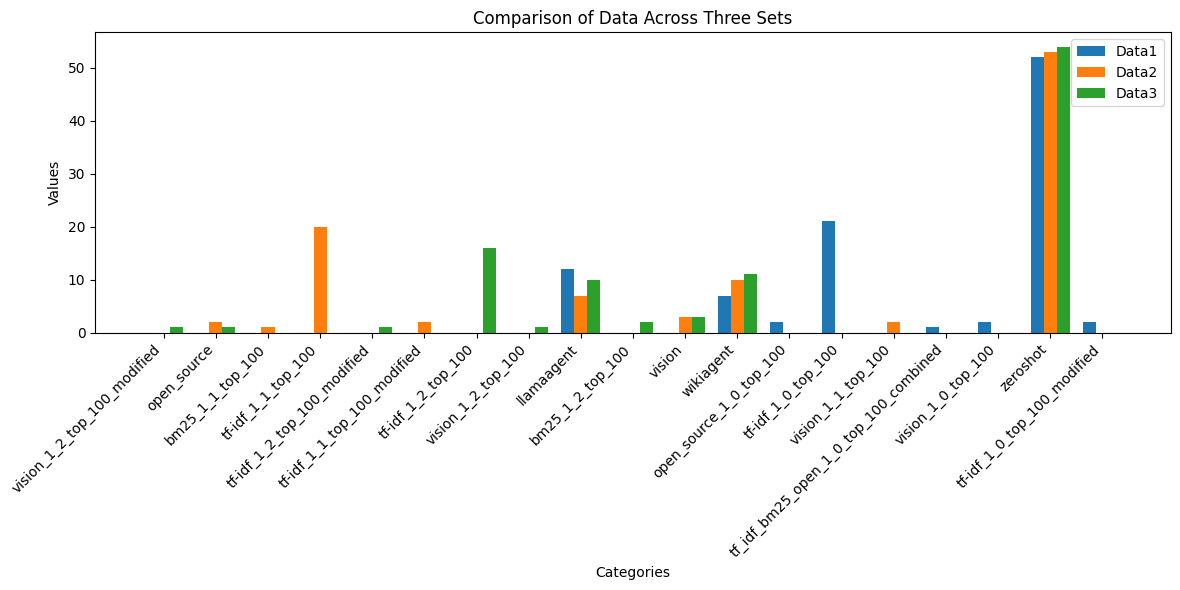

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided
data1 = {'zeroshot': 52, 'tf_idf_bm25_open_1_0_top_100_combined': 1, 'llamaagent': 12, 
         'tf-idf_1_0_top_100': 21, 'tf-idf_1_0_top_100_modified': 2, 'wikiagent': 7, 
         'vision_1_0_top_100': 2, 'open_source_1_0_top_100': 2}

data2 = {'zeroshot': 53, 'tf-idf_1_1_top_100': 20, 'vision': 3, 'vision_1_1_top_100': 2, 
         'llamaagent': 7, 'tf-idf_1_1_top_100_modified': 2, 'wikiagent': 10, 
         'open_source': 2, 'bm25_1_1_top_100': 1}

data3 = {'zeroshot': 54, 'tf-idf_1_2_top_100': 16, 'vision_1_2_top_100': 1, 
         'llamaagent': 10, 'bm25_1_2_top_100': 2, 'vision_1_2_top_100_modified': 1, 
         'tf-idf_1_2_top_100_modified': 1, 'wikiagent': 11, 'vision': 3, 
         'open_source': 1}

# Combine all keys and handle missing data with zeros
all_keys = set(data1.keys()).union(data2.keys(), data3.keys())
data_combined = {key: [data1.get(key, 0), data2.get(key, 0), data3.get(key, 0)] for key in all_keys}

# Prepare data for plotting
categories = list(data_combined.keys())
values = np.array(list(data_combined.values())).T

# Plot
x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, values[0], width, label='Data1')
bars2 = ax.bar(x, values[1], width, label='Data2')
bars3 = ax.bar(x + width, values[2], width, label='Data3')

# Customize plot
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison of Data Across Three Sets')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
